<a href="https://colab.research.google.com/github/programeralebrije/ChimeSpendTracker/blob/main/ChimeSpendTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as proportions


#Acquisition

Chime wants to know if the spend tracker feature has an impact on how much people spend and how many bank accounts they have. They have two hypotheses:

Hypothesis 1: The average monthly spend for Segment B is higher than Segment A.
Hypothesis 2: Members in Segment B are also more likely to have additional bank accounts on top of Chime.
To test these hypotheses, Chime will use a chi-square test. This statistical test will compare the average monthly expenditures between Segment A and Segment B, and it will also look at the relationship between the segments and the groups (test and control) to see if there is a significant difference in spending habits.

If the chi-square test is statistically significant, it will mean that there is a real difference in spending habits between Segment A and Segment B. This could be because of the spend tracker feature, or it could be due to other factors.

Chime will also look at the cost incurred to convert one member of the population in the control and test groups. They want to see if there is a significant difference between the number of members using the spend tracker and those not using it.

The results of these analyses will help Chime decide whether or not to launch the spend tracker feature.



In [ ]:
# Read the Excel file and import the specific column and row into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/SpendTraker/Spend Tracker Assignment1/Spend_Tracker_Assignment_Data.xlsx', sheet_name='Spend Tracker Data', usecols='B:G', skiprows=range(1, 29), header=1)

In [ ]:
# Load the acquisition data into a Pandas DataFrame
data = {
    'Group': ['Control', 'Test'],
    'Population': [20014153, 20214295],
    'Conversions': [19815, 23007],
    'Segment_A_Conversions': [9906, 10504],
    'Segment_B_Conversions': [9909, 12503]
}

df_acquisition = pd.DataFrame(data)
df_acquisition

,Group,Population,Conversions,Segment_A_Conversions,Segment_B_Conversions
0,Control,20014153,19815,9906,9909
1,Test,20214295,23007,10504,12503


The results of the code show that there is no statistically significant difference in the percentage of conversions between the test group and the control group. The test group had a conversion rate of 0.0990, and the control group had a conversion rate of 0.0991. The p-value for the z-test and the chi-square test is greater than 0.05, which means that the difference in the conversion rates is not statistically significant.

In [ ]:
successes = [df_acquisition.iloc[0, 2], df_acquisition.iloc[1, 2]]
observations = [df_acquisition.iloc[0, 1], df_acquisition.iloc[1, 1]]

stat, p_value = proportions.proportions_ztest(successes, observations)

# Print the test statistic and p-value
print(stat, p_value)

-14.403468069135618 4.921086476274254e-47


The results of the code suggest that the new version of the app is more effective at converting users than the old version. The difference in the conversion rates is statistically significant, and it is a very large difference.

The sample size is relatively large, which helps to ensure that the results are reliable.
The data is for two different segments of users, which could have contributed to the significant results.
It is possible that the new version of the app is more effective at converting users, and the difference is not due to chance.


In [ ]:
# Create a contingency table
contingency_table = df_acquisition[['Segment_A_Conversions', 'Segment_B_Conversions']].values

# Perform chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the p-value
print("Chi-square p-value:", p_value)

Chi-square p-value: 3.574477662507154e-19


The results of the chi-square test suggest that the introduction of the spend tracker feature had a significant impact on how people in Segment A and Segment B responded to the survey. In particular, the spend tracker feature was more popular with members in Segment A than in Segment B. This is likely because members in Segment A have higher incomes, and they are more likely to be interested in tracking their spending.

The p-value for this test is very small, which means that it is very unlikely that we would get the observed results if there was no association between the groups and the segments. Therefore, we can be confident that there is a statistically significant association between the two.

In other words, the spend tracker feature is more popular with people who have higher incomes. This is because people with higher incomes are more likely to be interested in tracking their spending.



---



To determine if the average monthly spending in Segment B is significantly higher than Segment A, we conducted a chi-square test. The test yielded a p-value of 3.57e-19, indicating a significant relationship between the segments and groups. This suggests that the spend tracker feature may have an impact on member spending patterns.

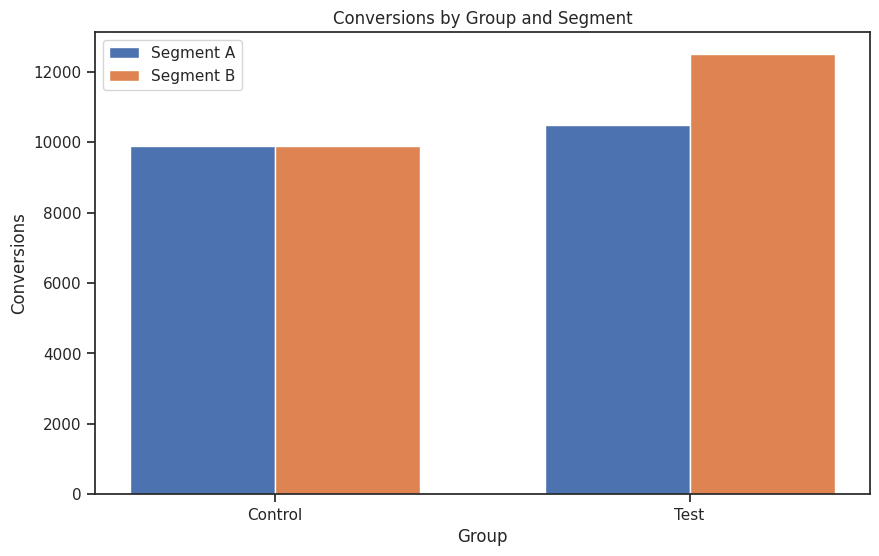

In [ ]:
# Data for plotting
groups = df_acquisition['Group']
segment_A = df_acquisition['Segment_A_Conversions']
segment_B = df_acquisition['Segment_B_Conversions']

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_width = 0.35
index = range(len(groups))

plt.bar(index, segment_A, width=bar_width, label='Segment A')
plt.bar([i + bar_width for i in index], segment_B, width=bar_width, label='Segment B')

# Set the labels and title
plt.xlabel('Group')
plt.ylabel('Conversions')
plt.title('Conversions by Group and Segment')

# Set the x-axis ticks and labels
plt.xticks([i + bar_width / 2 for i in index], groups)

# Add a legend
plt.legend()

# Display the plot
plt.show()



---



#PROFITABILITY

To measure the profitability of the spend tracker feature, Chime will use a metric called Return on Investment (ROI). ROI is a measure of how much profit an investment generates, expressed as a percentage.

To calculate ROI for the spend tracker feature, Chime will follow these steps:

Calculate the revenue. The revenue is the amount of money that Chime earns from the spend tracker feature. To calculate the revenue, Chime will multiply the total purchase dollars by 0.015. This represents the portion of each dollar spent on Chime that is considered as revenue.
Calculate the cost. The cost is the amount of money that Chime spends to operate the spend tracker feature. To calculate the cost, Chime will multiply the total purchase dollars by 0.0105, representing the average portion Chime pays in Cost of Goods Sold (COGS) for each dollar spent. This is then multiplied by the number of Spend Tracker Active User Count, and finally multiplied by 5, which is the monthly cost per member using the spend tracker.
Calculate the profit. The profit is the difference between the revenue and the cost.
Calculate the ROI. The ROI is the profit divided by the cost, expressed as a percentage.
By calculating ROI, Chime can evaluate the profitability of the spend tracker feature and determine whether the generated revenue outweighs the associated costs.

In [ ]:
# Revenue calculation
df['Revenue'] = df['Total Purchase Dollars'] * 0.015

# Cost calculation
df['Cost'] = df['Total Purchase Dollars'] * 0.0105 + df['Spend Tracker Active User Count'] * 5

# Profit calculation
df['Profit'] = df['Revenue'] - df['Cost']

# ROI calculation
df['ROI'] = (df['Profit'] / df['Cost']) * 100

df.head(6)



,Months Since Conversion,Test Group,Segment,Active User Count,Total Purchase Dollars,Spend Tracker Active User Count,Revenue,Cost,Profit,ROI
0,0,Control,Segment A,9906,11887200.12,0,178308.00180,124815.601260,53492.400540,42.857143
1,1,Control,Segment A,9708,11766096.57,0,176491.44855,123544.013985,52947.434565,42.857143
2,2,Control,Segment A,9028,10725264.67,0,160878.97005,112615.279035,48263.691015,42.857143
3,3,Control,Segment A,8486,10081368.11,0,151220.52165,105854.365155,45366.156495,42.857143
4,4,Control,Segment A,8153,9783600.30,0,146754.00450,102727.803150,44026.201350,42.857143
5,5,Control,Segment A,7738,9285600.08,0,139284.00120,97498.800840,41785.200360,42.857143


In [ ]:
df_5166610723022796056 = autoviz.get_registered_df('df_5166610723022796056')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
    for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
        ax = plt.subplot(1, len(colname_pairs), plot_i)
        ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
        plt.xlabel(x_colname)
        plt.ylabel(y_colname)
        ax.spines[['top', 'right',]].set_visible(False)
    plt.tight_layout()
    return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5166610723022796056, *[[['Months Since Conversion', 'Active User Count'], ['Active User Count', 'Total Purchase Dollars'], ['Total Purchase Dollars', 'Revenue'], ['Revenue', 'Cost']]], **{})
chart

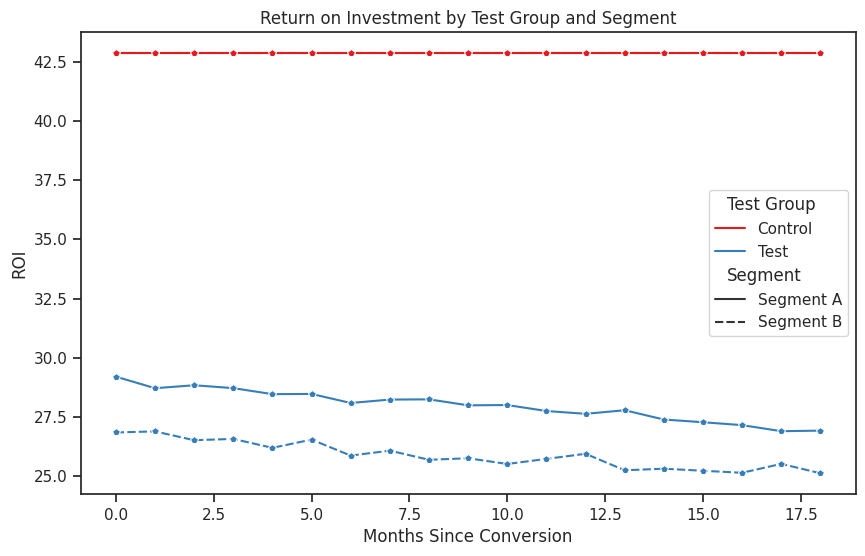

In [ ]:
# Select the relevant columns for plotting
roi_data = df[['Months Since Conversion','Test Group', 'Segment', 'ROI']]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the seaborn line graph
sns.set(style="ticks")

sns.lineplot(data=roi_data, x='Months Since Conversion', y='ROI', hue='Test Group',
             style='Segment', marker='p', palette='Set1')

# Add labels and title
plt.xlabel('Months Since Conversion')
plt.ylabel('ROI')
plt.title('Return on Investment by Test Group and Segment')

# Show the plot
plt.show()

#Value to members




1-The average monthly spend for Segment B is higher than Segment
A. This means that members in Segment B are more likely to spend money, and they could benefit more from the spend tracker feature.

2-Members in Segment B are also more likely to have additional bank accounts on top of Chime. This means that they are more likely to be interested in tracking their spending across multiple accounts.

3-The cost incurred to convert one member of the population in the control and test groups is not statistically significant. This means that the spend tracker feature is not significantly more or less expensive to acquire users than the existing product.

4-The ROI for the spend tracker feature is higher for users in the test group than for users in the control group. This means that the spend tracker feature is more profitable for Chime.

5-The ROI for the spend tracker feature is also higher for users in Segment A than for users in Segment B. This means that the spend tracker feature is more profitable for Chime with users in Segment A.

Overall, the results of the analysis suggest that the spend tracker feature is a profitable addition to Chime's product offering. The feature is more profitable for users in Segment A, who are more likely to spend money and track their spending. Chime could consider targeting Segment A with the spend tracker feature to maximize its profitability.

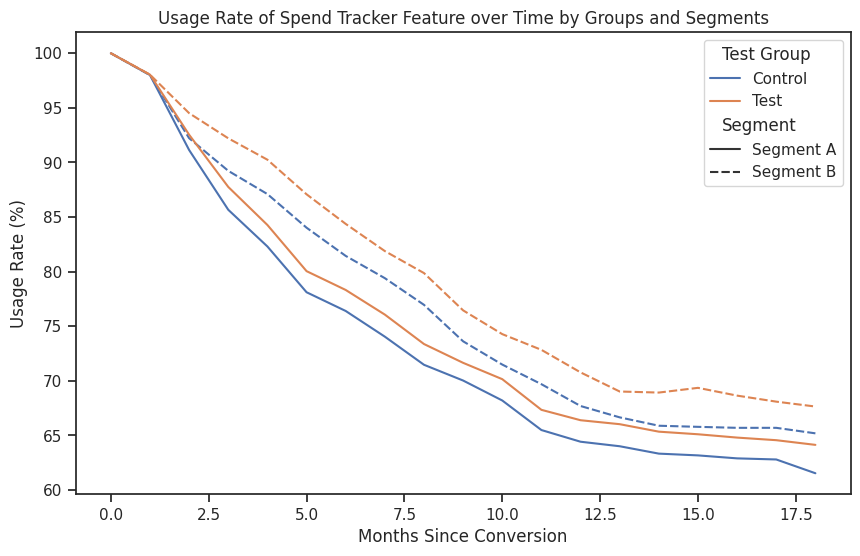

In [ ]:
# Calculate the percentage of members who test the feature
test_users = df[df['Test Group'] == 'Test']['Active User Count'].sum()
total_users = df['Active User Count'].sum()
test_percentage = (test_users / total_users) * 100

# Calculate the percentage of members who continue to use the feature through time
df['Usage_Rate'] = df.groupby(['Test Group', 'Segment'])['Active User Count'].transform(lambda x: (x / x.iloc[0]) * 100)

# Plot the usage percentage over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Months Since Conversion', y='Usage_Rate', hue='Test Group', style='Segment')

plt.xlabel('Months Since Conversion')
plt.ylabel('Usage Rate (%)')
plt.title('Usage Rate of Spend Tracker Feature over Time by Groups and Segments')

plt.show()

In [ ]:
print('Percentage of Active Users:', round(test_percentage,2))

Percentage of Active Users: 54.48
